# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 631


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}{city}&units=metric&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        response_json = requests.get(city_url).json()
        city_weather = response_json["weather"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response_json["coord"]["lat"]
        city_lng = response_json["coord"]["lon"]
        city_max_temp = response_json["main"]["temp_max"]
        city_humidity = response_json["main"]["humidity"]
        city_clouds = response_json["clouds"]["all"]
        city_wind = response_json["wind"]["speed"]
        city_country = response_json["sys"]["country"]
        city_date = response_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | borborema
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | kyshtovka
Processing Record 5 of Set 1 | poum
Processing Record 6 of Set 1 | omsukchan
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | bilibino
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | ambon
Processing Record 12 of Set 1 | comodoro rivadavia
Processing Record 13 of Set 1 | airai
Processing Record 14 of Set 1 | necochea
Processing Record 15 of Set 1 | belmonte
Processing Record 16 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | norman wells
Processing Record 20 of Set 1 | katsuura
Processing Record 21 of Set 1 | saint-philippe
Processing Record 22 of Set 1 | barrow
Processing R

Processing Record 32 of Set 4 | kahului
Processing Record 33 of Set 4 | sitka
Processing Record 34 of Set 4 | san quintin
Processing Record 35 of Set 4 | longyearbyen
Processing Record 36 of Set 4 | bethel
Processing Record 37 of Set 4 | vila
Processing Record 38 of Set 4 | walvis bay
Processing Record 39 of Set 4 | chuy
Processing Record 40 of Set 4 | arlit
Processing Record 41 of Set 4 | praia
Processing Record 42 of Set 4 | pedasi
Processing Record 43 of Set 4 | batticaloa
Processing Record 44 of Set 4 | port hardy
Processing Record 45 of Set 4 | charlotte
Processing Record 46 of Set 4 | vao
Processing Record 47 of Set 4 | tuktoyaktuk
Processing Record 48 of Set 4 | yulara
Processing Record 49 of Set 4 | naron
Processing Record 0 of Set 5 | gazanjyk
Processing Record 1 of Set 5 | new norfolk
Processing Record 2 of Set 5 | bengkulu
Processing Record 3 of Set 5 | halalo
City not found. Skipping...
Processing Record 4 of Set 5 | kurilsk
Processing Record 5 of Set 5 | loukhi
Processing 

City not found. Skipping...
Processing Record 22 of Set 8 | faya
Processing Record 23 of Set 8 | rio gallegos
Processing Record 24 of Set 8 | tura
Processing Record 25 of Set 8 | avera
Processing Record 26 of Set 8 | dongsheng
Processing Record 27 of Set 8 | haibowan
City not found. Skipping...
Processing Record 28 of Set 8 | nalut
Processing Record 29 of Set 8 | krasnyy chikoy
Processing Record 30 of Set 8 | semnan
Processing Record 31 of Set 8 | bolivar
Processing Record 32 of Set 8 | mahon
Processing Record 33 of Set 8 | grindavik
Processing Record 34 of Set 8 | hastings
Processing Record 35 of Set 8 | bundaberg
Processing Record 36 of Set 8 | sabha
Processing Record 37 of Set 8 | tautira
Processing Record 38 of Set 8 | brae
Processing Record 39 of Set 8 | padre bernardo
Processing Record 40 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 41 of Set 8 | okha
Processing Record 42 of Set 8 | waw
Processing Record 43 of Set 8 | polunochnoye
Processing Record 44 of S

Processing Record 10 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 11 of Set 12 | broome
Processing Record 12 of Set 12 | luderitz
Processing Record 13 of Set 12 | keti bandar
Processing Record 14 of Set 12 | fare
Processing Record 15 of Set 12 | calvia
Processing Record 16 of Set 12 | duzce
Processing Record 17 of Set 12 | barcelos
Processing Record 18 of Set 12 | ikornnes
Processing Record 19 of Set 12 | roseburg
Processing Record 20 of Set 12 | vicuna
Processing Record 21 of Set 12 | ashta
Processing Record 22 of Set 12 | oranjestad
Processing Record 23 of Set 12 | sovetskiy
Processing Record 24 of Set 12 | tokur
Processing Record 25 of Set 12 | la union
Processing Record 26 of Set 12 | linares
Processing Record 27 of Set 12 | la arena
Processing Record 28 of Set 12 | praia da vitoria
Processing Record 29 of Set 12 | kindu
Processing Record 30 of Set 12 | acatlan
Processing Record 31 of Set 12 | constitucion
Processing Record 32 of Set 12 | mandalgovi
Processin

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,borborema,-21.6197,-49.0736,30.80,45,100,2.87,BR,1670092175
1,qaanaaq,77.4840,-69.3632,-14.54,77,98,3.56,GL,1670092176
2,east london,-33.0153,27.9116,17.52,88,40,3.60,ZA,1670092177
3,kyshtovka,56.5550,76.6271,-23.01,90,23,2.70,RU,1670092177
4,poum,-20.2333,164.0167,25.68,87,90,1.73,NC,1670092178


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,borborema,-21.6197,-49.0736,30.80,45,100,2.87,BR,1670092175
1,qaanaaq,77.4840,-69.3632,-14.54,77,98,3.56,GL,1670092176
2,east london,-33.0153,27.9116,17.52,88,40,3.60,ZA,1670092177
3,kyshtovka,56.5550,76.6271,-23.01,90,23,2.70,RU,1670092177
4,poum,-20.2333,164.0167,25.68,87,90,1.73,NC,1670092178


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [34]:
# Create dataframe with subject columns
lat_temp_df = city_data_df[["Lat","Max Temp"]]
lat_temp_df

,Lat,Max Temp
City_ID,,
0,-21.6197,30.80
1,77.4840,-14.54
2,-33.0153,17.52
3,56.5550,-23.01
4,-20.2333,25.68
...,...,...
569,6.0367,24.77
570,65.4167,-1.46
571,8.8833,25.88


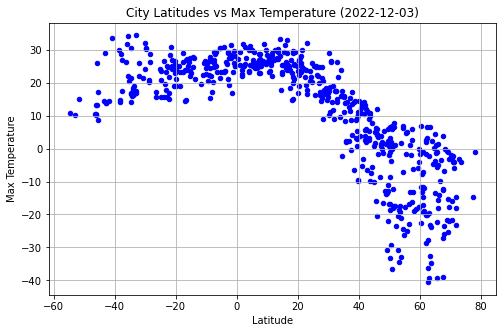

In [35]:
# Build scatter plot for latitude vs. temperature
lat_temp_scatter = lat_temp_df.plot.scatter(x='Lat',y='Max Temp',c='Blue', figsize = (8,5))

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitudes vs Max Temperature (2022-12-03)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

In [36]:
# Create dataframe with subject columns
lat_humi_df = city_data_df[["Lat","Humidity"]]
lat_humi_df

,Lat,Humidity
City_ID,,
0,-21.6197,45
1,77.4840,77
2,-33.0153,88
3,56.5550,90
4,-20.2333,87
...,...,...
569,6.0367,86
570,65.4167,65
571,8.8833,81


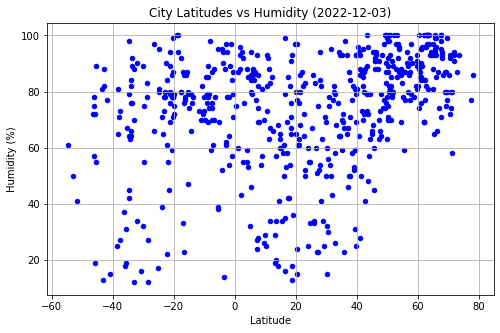

In [37]:
# Build the scatter plots for latitude vs. humidity
lat_humi_scatter = lat_humi_df.plot.scatter(x='Lat',y='Humidity',c='Blue', figsize = (8,5))

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitudes vs Humidity (2022-12-03)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [41]:
# Create dataframe with subject columns
lat_cloud_df = city_data_df[["Lat","Cloudiness"]]
lat_cloud_df

,Lat,Cloudiness
City_ID,,
0,-21.6197,100
1,77.4840,98
2,-33.0153,40
3,56.5550,23
4,-20.2333,90
...,...,...
569,6.0367,98
570,65.4167,100
571,8.8833,100


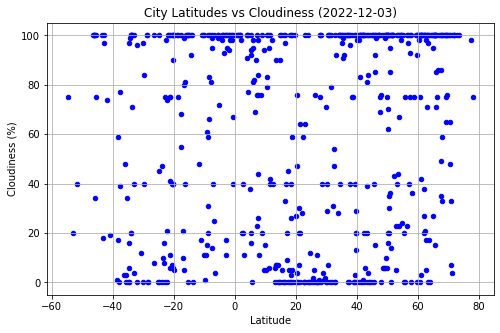

In [42]:
# Build the scatter plots for latitude vs. cloudiness
lat_cloud_scatter = lat_cloud_df.plot.scatter(x='Lat',y='Cloudiness',c='Blue', figsize = (8,5))

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitudes vs Cloudiness (2022-12-03)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [43]:
# Create dataframe with subject columns
lat_wind_df = city_data_df[["Lat","Wind Speed"]]
lat_wind_df

,Lat,Wind Speed
City_ID,,
0,-21.6197,2.87
1,77.4840,3.56
2,-33.0153,3.60
3,56.5550,2.70
4,-20.2333,1.73
...,...,...
569,6.0367,1.10
570,65.4167,10.23
571,8.8833,2.02


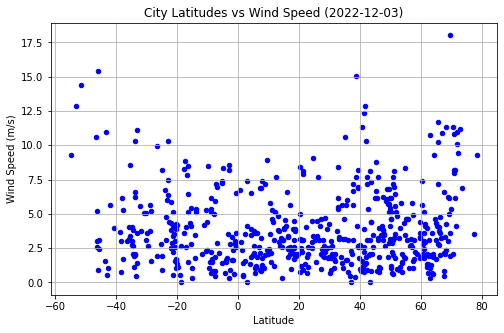

In [44]:
# Build the scatter plots for latitude vs. wind speed
lat_wind_scatter = lat_wind_df.plot.scatter(x='Lat',y='Wind Speed',c='Blue', figsize = (8,5))

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitudes vs Wind Speed (2022-12-03)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [84]:
# Define a function to create Linear Regression plots
def linear_regression(x_values,y_values,xlabel,ylabel):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(8,5))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"red")
    plt.annotate(line_eq,(6,1),fontsize=12,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    print(f'The r-value is:{rvalue}')
    plt.show()

In [85]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,qaanaaq,77.4840,-69.3632,-14.54,77,98,3.56,GL,1670092176
3,kyshtovka,56.5550,76.6271,-23.01,90,23,2.70,RU,1670092177
5,omsukchan,62.5333,155.8000,-27.65,82,5,2.00,RU,1670092179
7,bilibino,68.0546,166.4372,-26.00,94,33,2.33,RU,1670092180
8,kapaa,22.0752,-159.3190,24.15,87,28,1.34,US,1670092181


In [86]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,borborema,-21.6197,-49.0736,30.80,45,100,2.87,BR,1670092175
2,east london,-33.0153,27.9116,17.52,88,40,3.60,ZA,1670092177
4,poum,-20.2333,164.0167,25.68,87,90,1.73,NC,1670092178
6,ushuaia,-54.8000,-68.3000,10.79,61,75,9.26,AR,1670092179
9,vaini,-21.2000,-175.2000,25.09,94,75,0.51,TO,1670092089


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.8413815321737419


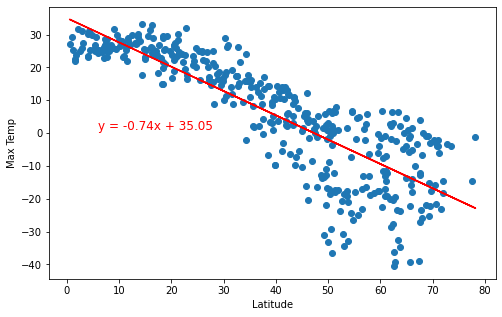

In [95]:
# Linear regression on Northern Hemisphere
linear_regression(x_values = northern_hemi_df["Lat"], y_values = northern_hemi_df["Max Temp"],xlabel = "Latitude",ylabel = "Max Temp")


The r-value is:0.4656464365653474


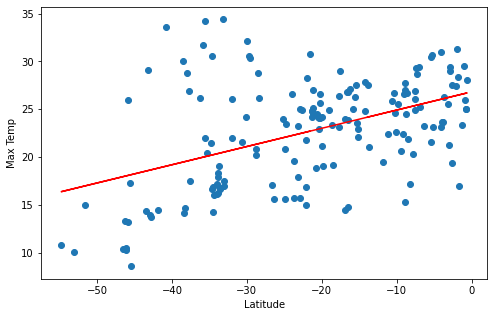

In [88]:
# Linear regression on Southern Hemisphere
linear_regression(x_values = southern_hemi_df["Lat"], y_values = southern_hemi_df["Max Temp"],xlabel = "Latitude",ylabel = "Max Temp")

**Discussion about the linear relationship:
The latitude and max temperature are negatively correlated with a strong correlation as the r-value is -0.8414. On the other hand, the result suggests a positive correlation between latitude and max temperature in the southern hemisphere, and the correlation is weaker as r-value is less than 0.5 at only 0.4656.

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.4541103272629078


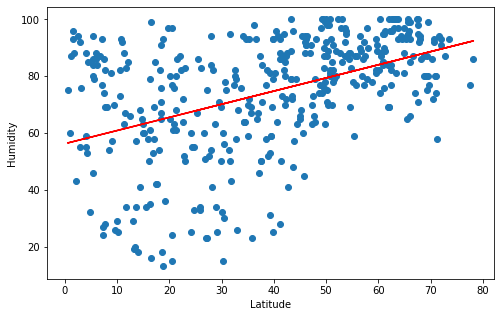

In [89]:
# Northern Hemisphere
linear_regression(x_values = northern_hemi_df["Lat"], y_values = northern_hemi_df["Humidity"],xlabel = "Latitude",ylabel = "Humidity")

The r-value is:0.28518273001057465


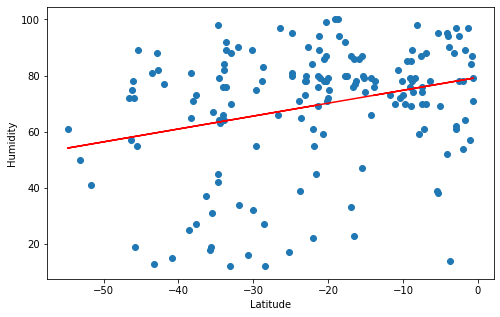

In [90]:
# Southern Hemisphere
linear_regression(x_values = southern_hemi_df["Lat"], y_values = southern_hemi_df["Humidity"],xlabel = "Latitude",ylabel = "Humidity")

**Discussion about the linear relationship:
The correlation between latitude and humidity of both northern hemisphere and southern hemisphere are positively correlated, and results suggest correlations between the two is moderate in northern hemisphere with r-value at 0.4541 and relatively weak in the southern hemisphere with r value at 0.2852.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.21711161168253565


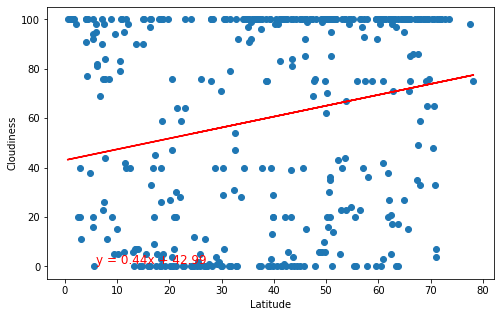

In [91]:
# Northern Hemisphere
linear_regression(x_values = northern_hemi_df["Lat"], y_values = northern_hemi_df["Cloudiness"],xlabel = "Latitude",ylabel = "Cloudiness")

The r-value is:0.17899824475871262


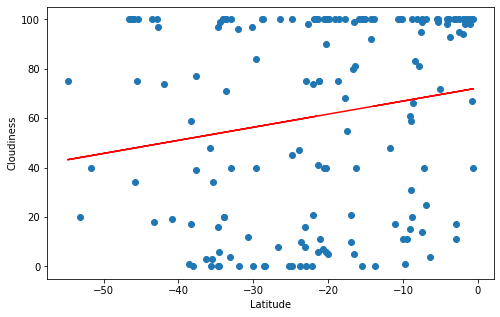

In [92]:
# Southern Hemisphere
linear_regression(x_values = southern_hemi_df["Lat"], y_values = southern_hemi_df["Cloudiness"],xlabel = "Latitude",ylabel = "Cloudiness")

**Discussion about the linear relationship:
Results suggests there is a weak positive correlation between latitude and cloudiness in both the northern hemisphere and southern hemisphere with r values at 0.2171 and 0.1790, respectively.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.20190435377677662


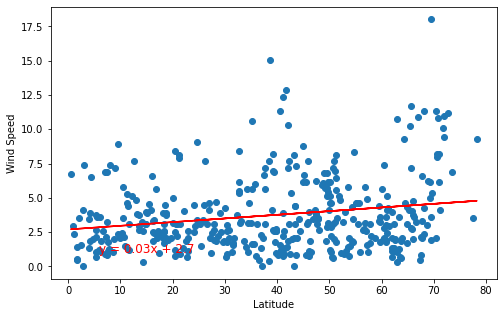

In [93]:
# Northern Hemisphere
linear_regression(x_values = northern_hemi_df["Lat"], y_values = northern_hemi_df["Wind Speed"],xlabel = "Latitude",ylabel = "Wind Speed")

The r-value is:-0.23904954386563518


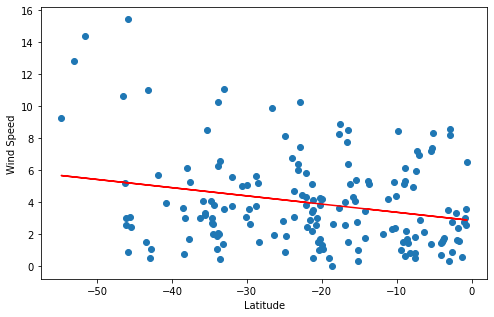

In [94]:
# Southern Hemisphere
linear_regression(x_values = southern_hemi_df["Lat"], y_values = southern_hemi_df["Wind Speed"],xlabel = "Latitude",ylabel = "Wind Speed")

**Discussion about the linear relationship:
Latitude and wind speed has a weak positive correlation in the northern hemisphere with a r value at only 0.2019. While result suggests a weak negative correlation between the latitude and wind speed in the southern hemisphere with r value at -0.2390.